In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the csv file
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# K - NEAREST NEIGHBOURS MODEL

In [3]:
#seperate features and target
features = df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1)
target = df["trip_duration"]

In [4]:
#converting the store and fwd flag to int type
df["store_and_fwd_flag"].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [5]:
pd.get_dummies(df["store_and_fwd_flag"]).head()

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [6]:
df1= pd.get_dummies(df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1))
df1.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,1,0


In [7]:
#seperate features and target
x = df1
y = df["trip_duration"]
x.shape,y.shape

((729322, 7), (729322,))

In [8]:
#scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [9]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.111111,0.856226,0.353352,0.856048,0.731696,1.0,0.0
1,0.222222,0.855612,0.350606,0.855497,0.725202,1.0,0.0
2,0.222222,0.855451,0.350007,0.856331,0.732015,1.0,0.0
3,0.666667,0.856087,0.352236,0.856174,0.732502,1.0,0.0
4,0.111111,0.855098,0.349251,0.855614,0.729095,1.0,0.0


In [10]:
#importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [11]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [12]:
#creating instance of KNN
reg = KNN(n_neighbors = 5)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  3586.587448801242


# Finding the value of k using elbow method

In [16]:
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [1]:
k = range(1,50)

In [18]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

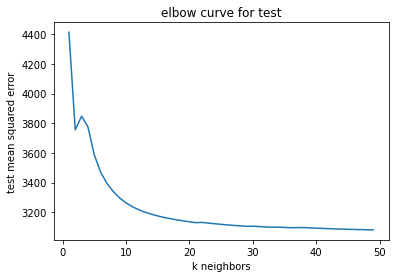

In [20]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [21]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  3263.4540532003707


The best value of k is 10

In [22]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

10.99215433391617

In [23]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-11.45843731199423

In [24]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store knn_test_score

Stored 'knn_test_score' (float64)


In [25]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store knn_train_score

Stored 'knn_train_score' (float64)


# Conclusions:
1. The Test RMSE is 3586.5874 when we took the value of k as 5

2. We used Elbow method in order to determine the value of k 

3. On using Elbow method I found that at k = 10 the test RMSE is lesser than the RMSE at K =5 i.e at k =10 the   test rmse is 3263.45

4. The train score is 10.99
5. The test score is -11.45 which is not quite preferable

